# Esercizio 08.1 e 2

L'ottimizzazione dei parametri $\sigma$ e $\mu$ è effettuata attraverso annealing simulato a **temperatura nulla** (cioè le mosse che provocano un aumento dell'energia sono sempre rifiutate). La forma semplice del potenziale dovrebbe scongiurare la possibilità di cadere in minimi relativi.

<span style="color:red"> Problema: l'energia minima trovata risulta leggermente **inferiore** rispetto a quella attesa.</span>

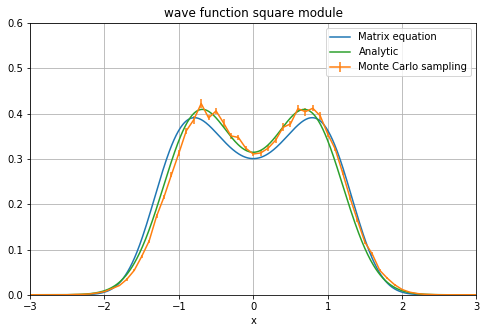

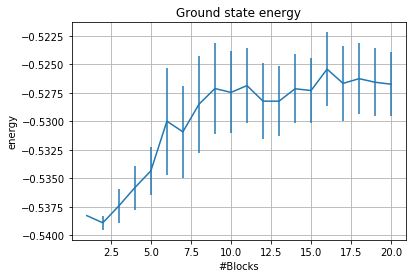

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

PsiMC = np.loadtxt("Psi.dat")
Energy = np.loadtxt("Energy.dat")
M , S = np.loadtxt("Results.dat") 


def Psi(x):
    return (math.e**(-(x-M)**2/(2*S)) + math.e**(-(x+M)**2/(2*S)))/((2*((S*math.pi)**0.5)*(1+math.exp(-M*M/S)))**0.5)


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
P = Psi(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
plt.figure(figsize=(8,5))
plt.plot(x,(psi[0])**2, label="Matrix equation")
plt.errorbar(PsiMC[:,0], PsiMC[:,1], PsiMC[:,2], label="Monte Carlo sampling")
plt.plot(x,P**2, label="Analytic")
plt.title("wave function square module")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((0,0.6))
plt.legend(loc="best")
plt.show()

plt.errorbar(Energy[:,0],Energy[:,1], Energy[:,2])
plt.title("Ground state energy")
plt.ylabel("energy")
plt.xlabel("#Blocks")
plt.grid(True)
plt.show()

# Esercizio 08.3

## Path Integral Ground State

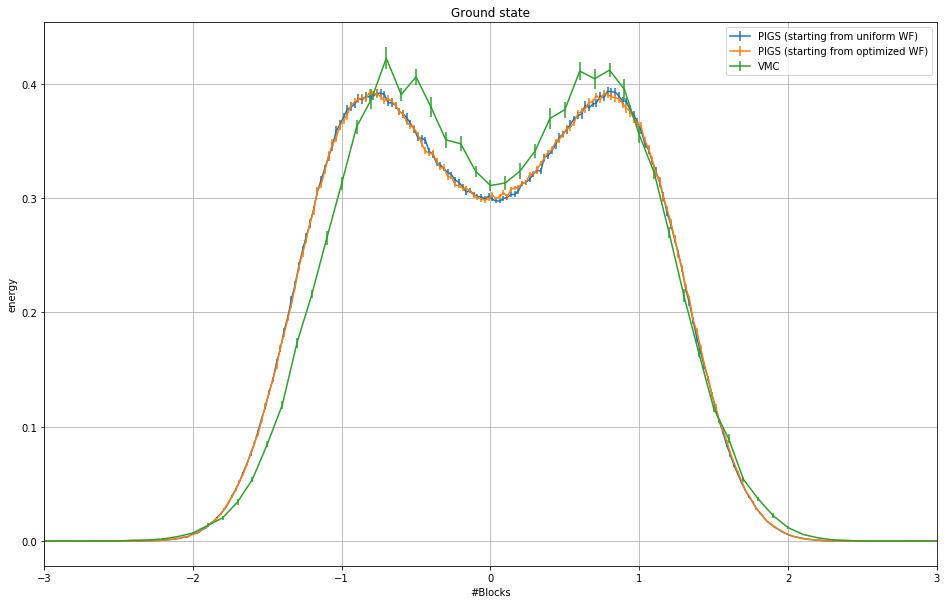

In [33]:
Psi_PIGS_1 = np.loadtxt("QMC_1D/PIGS_1/probability.dat")
Psi_PIGS_psit = np.loadtxt("QMC_1D/PIGS_psit/probability.dat")
Psi_PIMC = np.loadtxt("QMC_1D/PIMC/probability.dat")

plt.figure(figsize=(16,10))
plt.errorbar(Psi_PIGS_1[:,0], Psi_PIGS_1[:,1], Psi_PIGS_1[:,2], label='PIGS (starting from uniform WF)')
plt.errorbar(Psi_PIGS_psit[:,0], Psi_PIGS_psit[:,1], Psi_PIGS_psit[:,2], label='PIGS (starting from optimized WF)')
plt.errorbar(PsiMC[:,0], PsiMC[:,1], PsiMC[:,2], label="VMC")
plt.legend(loc='best')
plt.xlim((-3,3))
plt.title("Ground state")
plt.ylabel("energy")
plt.xlabel("#Blocks")
plt.grid(True)
plt.show()

## Path Integral Monte Carlo

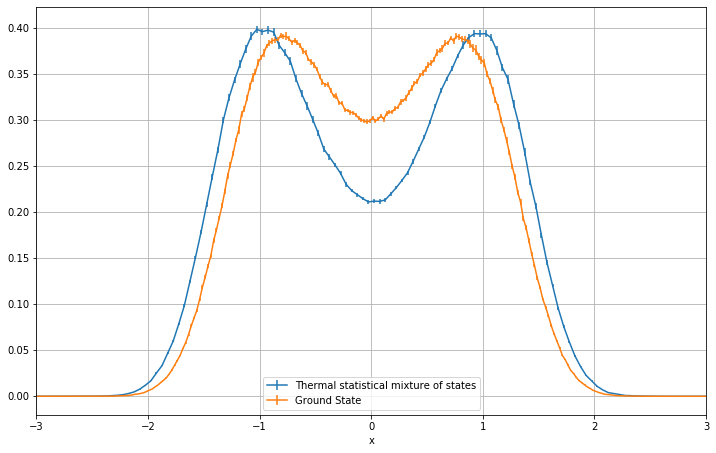

In [34]:
Psi_PIGS_psit = np.loadtxt("QMC_1D/PIGS_psit/probability.dat")

plt.figure(figsize=(12,7.5))
plt.errorbar(Psi_PIMC[:,0], Psi_PIMC[:,1], Psi_PIMC[:,2], label='Thermal statistical mixture of states')
plt.errorbar(Psi_PIGS_psit[:,0], Psi_PIGS_psit[:,1], Psi_PIGS_psit[:,2], label="Ground State")
plt.legend(loc='best')
plt.xlim((-3,3))
plt.xlabel("x")
plt.grid(True)
plt.show()